# Analyze IMU Data

What Are Some Basic Summary Statisitcs of the IMU Data?

## Dependencies

In [1]:
import os, stat
import numpy as np
import utils.pupil_filemethods as fm
from collections import defaultdict
import matplotlib.pyplot as plt

## Parameters

In [2]:
base_dir = '/hmet_data/full_collection_dec2020'
data_dir = os.path.join(base_dir, 'raw')
output_dir = os.path.join(base_dir, 'analysis')

#trial = '2020_12_24/016' #vasha sandwich
#trial = '2020_12_24/016' #vasha sandwich
#trial = '2020_12_22/005' #vasha computer
trial = '2020_12_24/007' #dar sandwich

## Readin & Convert Traces

In [3]:
def pldata_2_dict(pldata):
    dic_rep = [dict(d) for d in pldata]
    out_dic = defaultdict(list)
    for item in dic_rep:
        for key, value in item.items():
            out_dic[key].append(value)
    out_dic = dict(out_dic)
    #del out_dic['topic']
    return(out_dic)


In [4]:
head_imu_ext = ''
body_imu_ext = '_b'
#read in pldatafile
head_imu_data, head_imu_timestamps, _ = fm.load_pldata_file(os.path.join(data_dir,trial),f'odometry{head_imu_ext}')
body_imu_data, body_imu_timestamps, _ = fm.load_pldata_file(os.path.join(data_dir,trial),f'odometry{body_imu_ext}')\
#convert to well formated dict
head_imu_data = pldata_2_dict(head_imu_data)
body_imu_data = pldata_2_dict(body_imu_data)

print(head_imu_data.keys())

dict_keys(['topic', 'timestamp', 'rs_timestamp', 'tracker_confidence', 'position', 'orientation', 'linear_velocity', 'angular_velocity'])


## Position

Text(0.5, 1.0, 'Head Positions')

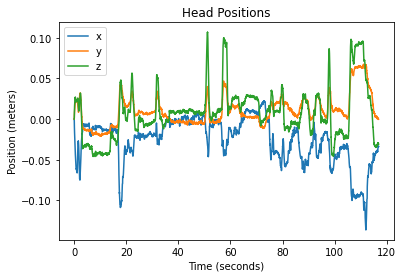

In [25]:
head_tstamps = np.array(head_imu_data['timestamp'])
head_positions_xyz = np.array(head_imu_data['position']).T

head_tstamps = head_tstamps - head_tstamps[0]
head_positions_xyz = head_positions_xyz - head_positions_xyz[:,0,None]

plt.plot(head_tstamps, head_positions_xyz[0], label=('x'))
plt.plot(head_tstamps, head_positions_xyz[1], label=('y'))
plt.plot(head_tstamps, head_positions_xyz[2], label=('z'))
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Position (meters)')
plt.title("Head Positions")

Text(0.5, 1.0, 'Body Positions')

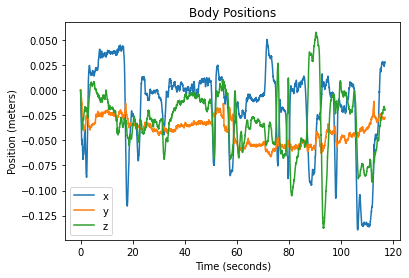

In [28]:
body_tstamps = np.array(body_imu_data['timestamp'])
body_positions_xyz = np.array(body_imu_data['position']).T

body_tstamps = body_tstamps - body_tstamps[0]
body_positions_xyz = body_positions_xyz - body_positions_xyz[:,0,None]

plt.plot(body_tstamps, body_positions_xyz[0], label=('x'))
plt.plot(body_tstamps, body_positions_xyz[1], label=('y'))
plt.plot(body_tstamps, body_positions_xyz[2], label=('z'))
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Position (meters)')
plt.title("Body Positions")

## Orientation

Text(0.5, 1.0, 'Body Orientations')

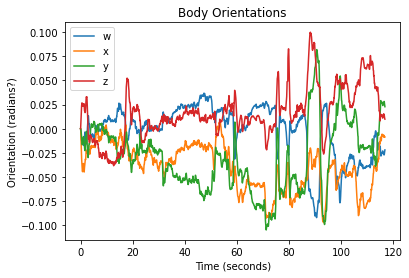

In [62]:
body_orientations_xyz = np.array(body_imu_data['orientation']).T
body_orientations_xyz = body_orientations_xyz - body_orientations_xyz[:,0,None]

plt.plot(body_tstamps, body_orientations_xyz[0], label=('w'))
plt.plot(body_tstamps, body_orientations_xyz[1], label=('x'))
plt.plot(body_tstamps, body_orientations_xyz[2], label=('y'))
plt.plot(body_tstamps, body_orientations_xyz[3], label=('z'))

plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Orientation (radians?)')
plt.title("Body Orientations")

Text(0.5, 1.0, 'Head Orientations')

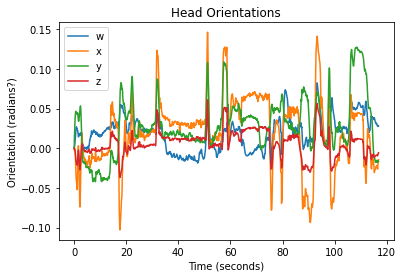

In [61]:
head_orientations_xyz = np.array(head_imu_data['orientation']).T
head_orientations_xyz = head_orientations_xyz - head_orientations_xyz[:,0,None]

plt.plot(head_tstamps, head_orientations_xyz[0], label=('w'))
plt.plot(head_tstamps, head_orientations_xyz[1], label=('x'))
plt.plot(head_tstamps, head_orientations_xyz[2], label=('y'))
plt.plot(head_tstamps, head_orientations_xyz[3], label=('z'))
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Orientation (radians?)')
plt.title("Head Orientations")

## Linear Velocity

Text(0.5, 1.0, 'Linear Velocities')

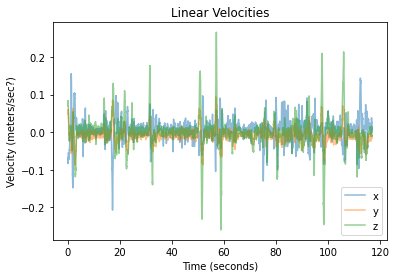

In [56]:
head_linvel = np.array(head_imu_data['linear_velocity']).T
#head_linvel = head_linvel - head_linvel[:,0,None]

plt.plot(head_tstamps, head_linvel[0], label=('x'),alpha=0.5)
plt.plot(head_tstamps, head_linvel[1], label=('y'),alpha=0.5)
plt.plot(head_tstamps, head_linvel[2], label=('z'),alpha=0.5)
#plt.plot(body_tstamps, body_linvel[0], label=('body'),alpha=0.5)

plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (meters/sec?)')
plt.title("Head Linear Velocities")

Text(0.5, 1.0, 'Body Linear Velocities')

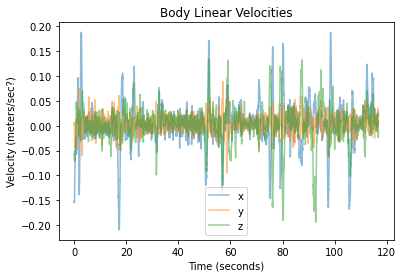

In [58]:
body_linvel = np.array(body_imu_data['linear_velocity']).T
#body_linvel = body_linvel - body_linvel[:,0,None]

plt.plot(body_tstamps, body_linvel[0], label=('x'),alpha=0.5)
plt.plot(body_tstamps, body_linvel[1], label=('y'),alpha=0.5)
plt.plot(body_tstamps, body_linvel[2], label=('z'),alpha=0.5)

plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (meters/sec?)')
plt.title("Body Linear Velocities")

Text(0.5, 1.0, 'Linear Velocity Distributions')

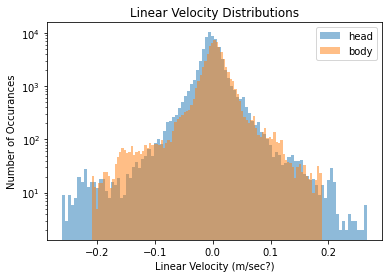

In [55]:
plt.hist(head_linvel.flatten(),alpha=0.5, label='head',bins=100)
plt.hist(body_linvel.flatten(),alpha=0.5, label='body', bins=100)
plt.semilogy()
plt.legend()
plt.xlabel('Linear Velocity (m/sec?)')
plt.ylabel('Number of Occurances')
plt.title('Linear Velocity Distributions')

## Angular Velocity

Text(0.5, 1.0, 'Head Angular Velocities')

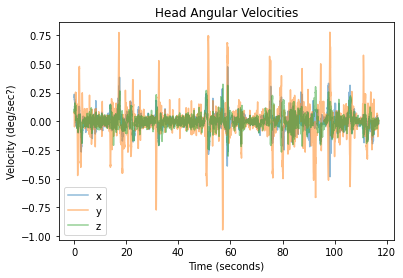

In [39]:
head_angvel_xyz = np.array(head_imu_data['angular_velocity']).T
#head_orientations_xyz = head_orientations_xyz - head_orientations_xyz[:,0,None]

plt.plot(head_tstamps, head_angvel_xyz[0], label=('x'),alpha=0.5)
plt.plot(head_tstamps, head_angvel_xyz[1], label=('y'),alpha=0.5)
plt.plot(head_tstamps, head_angvel_xyz[2], label=('z'),alpha=0.5)
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (deg/sec?)')
plt.title("Head Angular Velocities")

Text(0.5, 1.0, 'Body Angular Velocities')

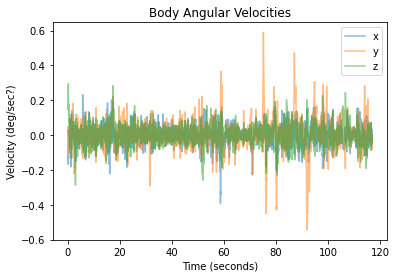

In [40]:
body_angvel_xyz = np.array(body_imu_data['angular_velocity']).T
#body_angvel_xyz = body_angvel_xyz - body_angvel_xyz[:,0,None]

plt.plot(body_tstamps, body_angvel_xyz[0], label=('x'),alpha=0.5)
plt.plot(body_tstamps, body_angvel_xyz[1], label=('y'),alpha=0.5)
plt.plot(body_tstamps, body_angvel_xyz[2], label=('z'),alpha=0.5)
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (deg/sec?)')
plt.title("Body Angular Velocities")

Text(0.5, 1.0, 'Angular Velocity Distributions')

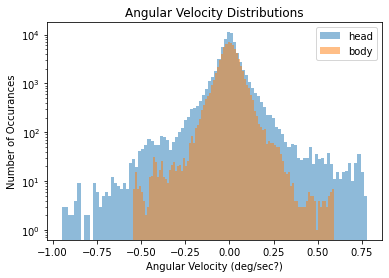

In [37]:
plt.hist(head_angvel_xyz.flatten(),alpha=0.5, label='head',bins=100)
plt.hist(body_angvel_xyz.flatten(),alpha=0.5, label='body', bins=100)
plt.semilogy()
plt.legend()
plt.xlabel('Angular Velocity (deg/sec?)')
plt.ylabel('Number of Occurances')
plt.title('Angular Velocity Distributions')